In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from natsort import natsorted, order_by_index, index_natsorted
import os
%matplotlib inline

In [2]:
folder = "/home/philipp/projects/dad4td/reports/unsup_final/"
files = sorted([folder+x for x in os.listdir(folder)])
[(i, x) for i, x in enumerate(files)]

[(0,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_bert.tsv'),
 (1,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_bert_cased.tsv'),
 (2,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_doc2vec_01_10.tsv'),
 (3,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_eval_apnews.tsv'),
 (4,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_eval_wiki.tsv'),
 (5,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_longformer_lowered.tsv'),
 (6,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_cluster_roberta_lowered.tsv'),
 (7,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_dimred_dimred_big_2.tsv'),
 (8, '/home/philipp/projects/dad4td/reports/unsup_final/0001_ivis_test.tsv'),
 (9,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_pyod_autoencer_full_data.tsv'),
 (10,
  '/home/philipp/projects/dad4td/reports/unsup_final/0001_pyod_autoencer_refined_ext.tsv'),
 (11,


In [3]:
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df.columns

Index(['Unnamed: 0', 'cluster_n', 'completeness', 'contamination', 'data_frac',
       'f1_macro', 'hash', 'homogeneity', 'in_f1', 'min_cluster_sizes_',
       'mix_ratios_', 'n_comps_', 'out_f1', 'out_prec', 'out_rec', 'seed',
       'time', 'umap_metrics_', 'v_measure', 'as_numpy', 'dim_reduce_time',
       'dim_reducer', 'distance', 'embedding_dims', 'fraction', 'k', 'kwargs',
       'metric', 'model', 'model_name', 'model_train_data', 'model_type',
       'n_components', 'n_epochs_without_progress', 'name', 'set_op_mix_ratio',
       'doc2vec_data_frac', 'doc2vec_epochs', 'doc2vec_min_count',
       'model_path', 'outlier_detector', 'epochs', 'hidden_neurons',
       'Unnamed: 0.1', 'model_size_params', 'accuracy', 'dim_red_name', 'f1',
       'in_prec', 'in_rec', 'pr_auc', 'roc_auc'],
      dtype='object')

In [4]:
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.dropna(subset=["outlier_detector"])
df.outlier_detector.loc[(df.outlier_detector.str.startswith("AE"))] = "AE"
df.outlier_detector.value_counts()

AE         3345
HBOS       1078
OCSVM      1076
iForest     793
LOF         793
PCA         791
CBLOF       284
ivis        157
KNN         136
Name: outlier_detector, dtype: int64

In [5]:
df.groupby(["outlier_detector"]).mean().f1_macro

outlier_detector
AE         0.786875
CBLOF      0.646425
HBOS       0.647078
KNN        0.490339
LOF        0.543706
OCSVM      0.713161
PCA        0.646861
iForest    0.619545
ivis       0.590814
Name: f1_macro, dtype: float64

In [6]:
df.groupby(["model_type"]).mean().f1_macro

model_type
doc2vec              0.730912
grnn                 0.459274
transformer          0.578023
wordembeddingpool    0.635772
Name: f1_macro, dtype: float64

In [7]:
pd.set_option('display.max_rows', 500)
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
#df = df.dropna(subset=["outlier_detector"])
#df.outlier_detector.loc[(df.outlier_detector.str.startswith("AE"))] = "AE"
df.fillna(0).groupby([ "outlier_detector", "model_name"]).mean().f1_macro

outlier_detector  model_name                          
0                 0                                       0.575777
                  allnews_05_15_30                        0.700609
                  doc2vec_wiki_all                        0.609609
                  doc2vecapnews                           0.858750
                  doc2vecimdb20news1010001                0.558837
                  doc2vecwiki011030                       0.567122
                  doc2vecwiki013030                       0.569550
                  doc2vecwikiimdb20news013030             0.790906
                  extvec                                  0.539608
                  glove                                   0.536937
AE                allenai/longformer-base-4096            0.510204
                  allnews_05_15_30                        0.802140
                  crawl                                   0.655321
                  doc2vec_wiki_all                        0.691421
       

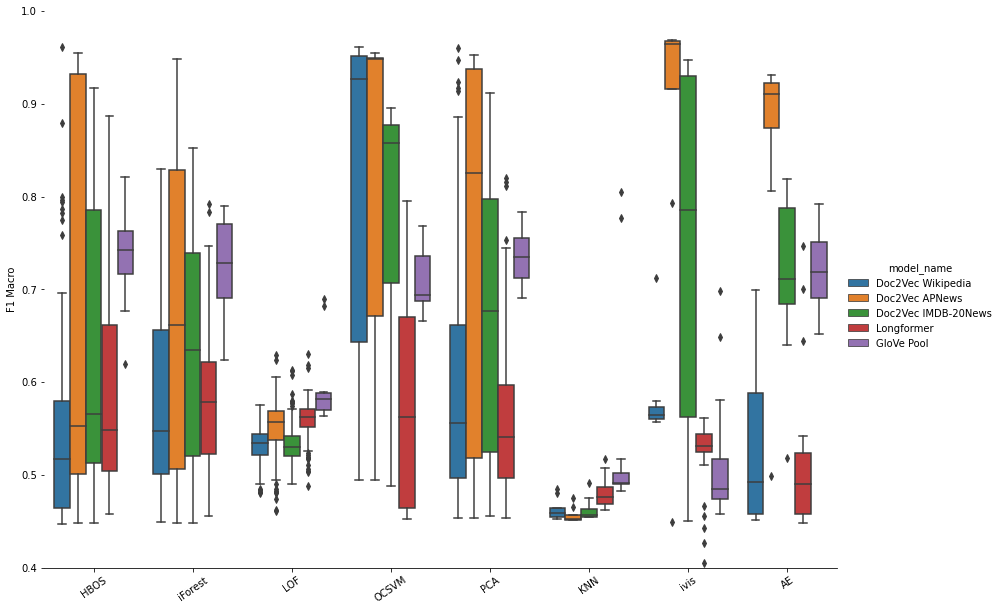

In [111]:
def create_barplot(df, x, y, folder="/home/philipp/projects/dad4td/thesis/pictures/", 
                   filename=None, fformat="png", rotation=35,
                  labely="SCORE", labelx="", show=False, **kwargs):
    
    options = dict(palette="tab10", height=8.27, aspect=11.7/8.27, kind="bar", hue=None)
    options.update(kwargs)
        
    g = sns.catplot(
        data=df, x=x, y=y, ci="sd",**options
    )
    g.despine(left=True)
    g.set_axis_labels(labelx, labely)
    g.set_xticklabels(rotation=rotation)
    if filename:
        plt.savefig(folder+filename+"."+fformat, format=fformat)
    if show:
        plt.show()
    return g
    
remap = {"doc2vec_wiki_all":"Doc2Vec Wikipedia", "doc2vecapnews":"Doc2Vec APNews",
         "doc2vecwikiimdb20news011001":"Doc2Vec IMDB-20News", "allenai/longformer-large-4096":"Longformer",
         "allenai/longformer-base-4096":"Longformer", "allnews_05_15_30":"All News", "glove": "GloVe Pool"}    

files = ["/home/philipp/projects/dad4td/reports/unsup_final/pyod_nored_doc2vec_longformer.tsv", 
         "/home/philipp/projects/dad4td/reports/unsup_final/pyod_umap_doc2vec_longformer.tsv",
        "/home/philipp/projects/dad4td/reports/unsup_final/KNN_and_ivis.tsv",
        "/home/philipp/projects/dad4td/reports/unsup_final/WEP_RNNs.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/KNN_and_ivis_longformer.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/AE_all.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/AE_longformer.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/all_news_all.tsv"
        ]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.where(~df.model_name.isin(["allnews_05_15_30", "glove_trec_6", "glove_amazon", "fasttext_amazon"])).dropna(how="all")
df = df.replace({"model_name":remap})
df = df.fillna(0)

g = create_barplot(df, x="outlier_detector", y="f1_macro", hue="model_name", kind="box", labely="F1 Macro",
               filename="ODD-Model")
g.set(ylim=(0.4,1.0))
#g.map(plt.axhline, y=0.5, ls='--', c='red')

scores2 = ["f1_macro", "f1", "in_rec", "out_rec", "roc_auc", "pr_auc"]
df_group = df.groupby(["outlier_detector", "model_name"]).mean()[scores2]
latex_code = df_group.to_latex(float_format="%.3f")
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
#print(latex_code)
#df_group

In [9]:
df[scores2].corr()

,f1_macro,f1,in_rec,out_rec,roc_auc,pr_auc
f1_macro,1.000000,-0.036778,-0.033685,0.972066,0.025162,-0.041000
f1,-0.036778,1.000000,0.998975,0.019455,0.972990,0.998282
in_rec,-0.033685,0.998975,1.000000,0.012227,0.967795,0.994609
out_rec,0.972066,0.019455,0.012227,1.000000,0.101222,0.028379
roc_auc,0.025162,0.972990,0.967795,0.101222,1.000000,0.976507
pr_auc,-0.041000,0.998282,0.994609,0.028379,0.976507,1.000000


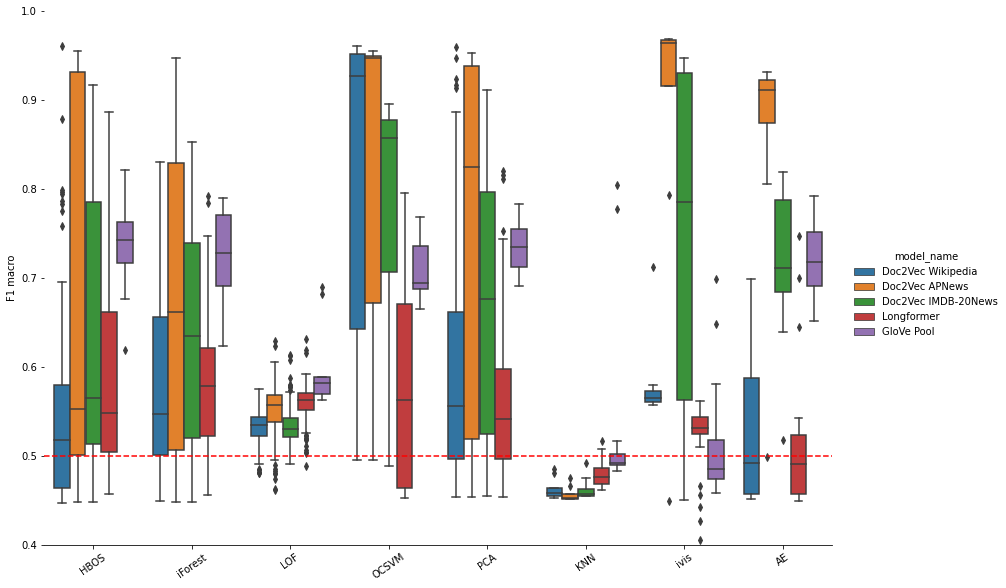

In [23]:
g = create_barplot(df, x="outlier_detector", y="f1_macro", hue="model_name", kind="box")
g.set(ylim=(0.4,1.0))
g.map(plt.axhline, y=0.5, ls='--', c='red')
g.set_axis_labels("", "F1 macro")

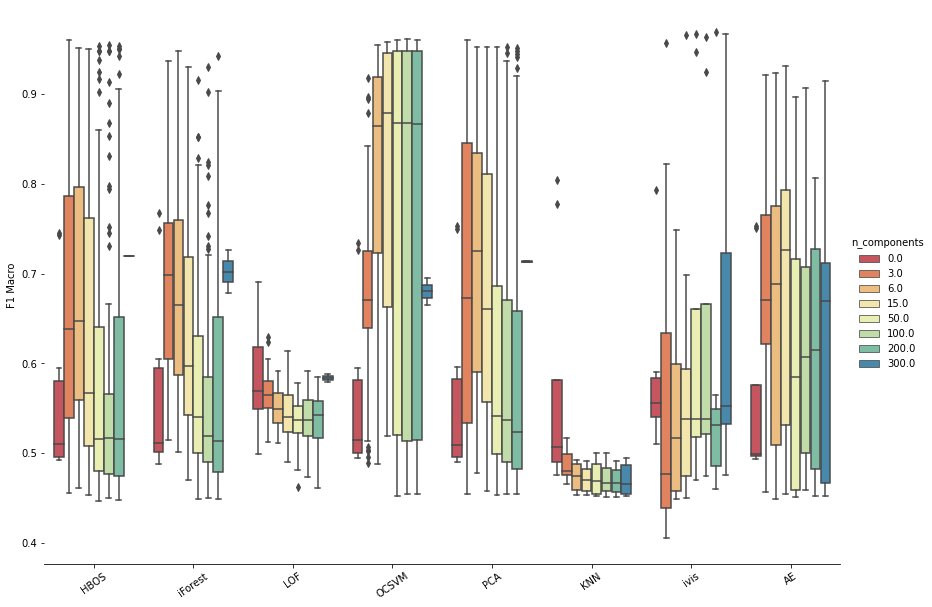

In [112]:
create_barplot(df, x="outlier_detector", y="f1_macro", hue="n_components", kind="box", labely="F1 Macro",
               filename="ODD-n_comp",
              palette="Spectral")

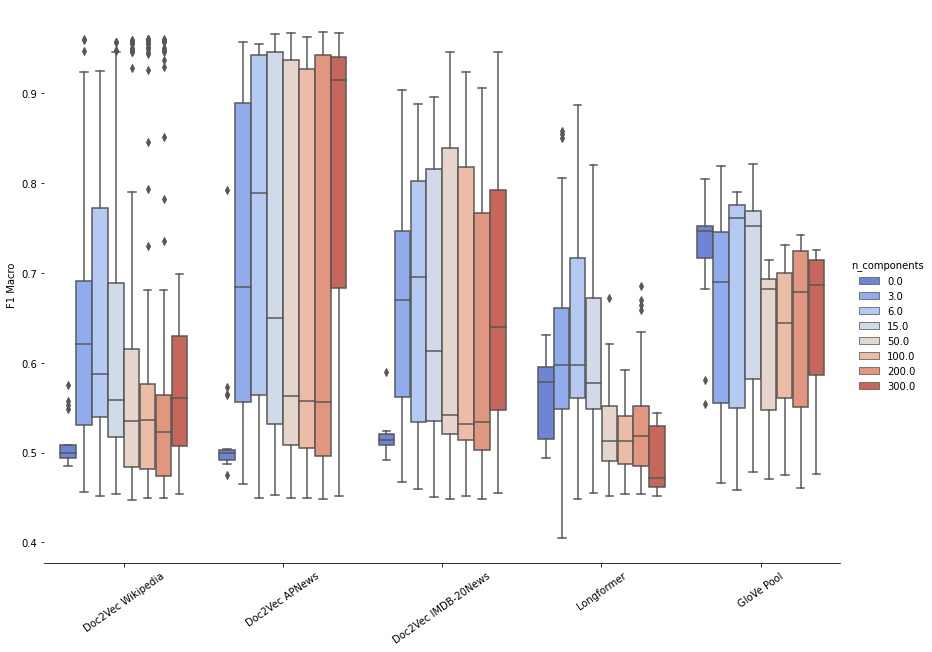

In [113]:
create_barplot(df, x="model_name", y="f1_macro", hue="n_components", kind="box", labely="F1 Macro",
               filename="model-n_comp",              palette="coolwarm")

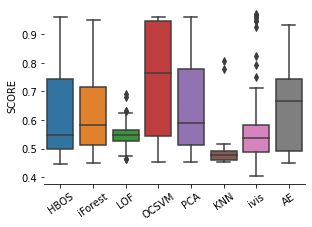

In [13]:
create_barplot(df, x="outlier_detector", y="f1_macro", hue=None, height=3, aspect=11.7/8.27, kind="box", filename="ODD")

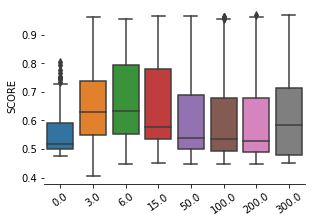

In [14]:
create_barplot(df, x="n_components", y="f1_macro", hue=None, height=3, aspect=11.7/8.27, kind="box", filename="n_components")

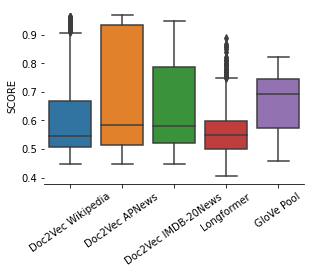

In [15]:
create_barplot(df, x="model_name", y="f1_macro", hue=None, height=3, aspect=11.7/8.27, kind="box", filename="unsup-model")

In [16]:
res = df.groupby(["model_name", "outlier_detector", "n_components"]).mean().reset_index().sort_values(by="f1_macro", ascending=False).reset_index()
latex_code = res[["model_name", "outlier_detector", "n_components", "f1_macro"]].head(50).to_latex()
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{lllrr}
\toprule
{} &           model\_name & outlier\_detector &  n\_components &  f1\_macro \\ \hline
\midrule
0  &       Doc2Vec APNews &             ivis &         200.0 &  0.968852 \\ \hline
1  &       Doc2Vec APNews &             ivis &         300.0 &  0.967341 \\ \hline
2  &       Doc2Vec APNews &             ivis &          50.0 &  0.967030 \\ \hline
3  &       Doc2Vec APNews &             ivis &          15.0 &  0.965898 \\ \hline
4  &       Doc2Vec APNews &             ivis &         100.0 &  0.963022 \\ \hline
5  &       Doc2Vec APNews &             ivis &           3.0 &  0.957231 \\ \hline
6  &  Doc2Vec IMDB-20News &             ivis &          50.0 &  0.946644 \\ \hline
7  &  Doc2Vec IMDB-20News &             ivis &         300.0 &  0.945779 \\ \hline
8  &       Doc2Vec APNews &               AE &          15.0 &  0.930861 \\ \hline
9  &  Doc2Vec IMDB-20News &             ivis &         100.0 &  0.924425 \\ \hline
10 &       Doc2Vec APNews &               

256.0    132
128.0    132
64.0     132
2.0      132
300.0     21
200.0     21
100.0     21
50.0      21
15.0      21
6.0       21
3.0       21
Name: n_components, dtype: int64


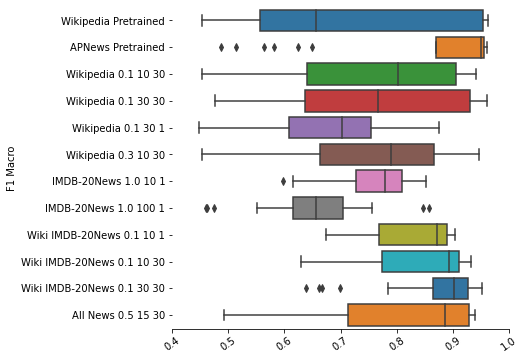

In [117]:
import numpy as np
files = ["/home/philipp/projects/dad4td/reports/unsup_final/test_doc2vec_models.tsv",
        "/home/philipp/projects/dad4td/reports/unsup_final/all_news_all.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
print(df.n_components.value_counts())
df = df.where((df.outlier_detector.isin(["HBOS","OCSVM"])))

remap = {"doc2vec_wiki_all":"Wikipedia Pretrained", "doc2vecapnews":"APNews Pretrained",
         "doc2vecwiki013001":"Wikipedia 0.1 30 1", "doc2vecwiki011030":"Wikipedia 0.1 10 30",
        "doc2vecwiki013030":"Wikipedia 0.1 30 30", "doc2vecwiki031030":"Wikipedia 0.3 10 30",
        "doc2vecwikiimdb20news011030":"Wiki IMDB-20News 0.1 10 30", 
         "doc2vecwikiimdb20news011001":"Wiki IMDB-20News 0.1 10 1",
         "doc2vecwikiimdb20news013030":"Wiki IMDB-20News 0.1 30 30",
         "doc2vecimdb20news101001":"IMDB-20News 1.0 10 1",
         "doc2vecimdb20news1010001":"IMDB-20News 1.0 100 1",
         "allnews_05_15_30": "All News 0.5 15 30"
         
        }
df = df.replace({"model_name":remap})
         
create_barplot(df, x="f1_macro", y="model_name", hue=None, height=5, labely="F1 Macro",
               aspect=11.7/8.27, kind="box", filename="Doc2Vec-Selftrained")

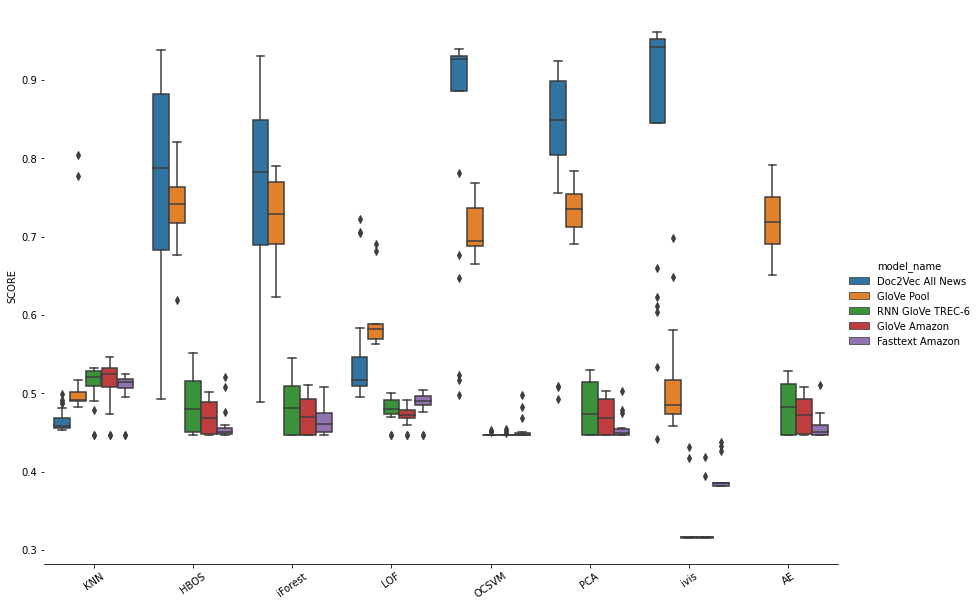

In [18]:
files = ["/home/philipp/projects/dad4td/reports/unsup_final/all_news_all.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/WEP_RNNs.tsv"
        ]

remap = {"glove": "GloVe Pool", "glove_trec_6": "RNN GloVe TREC-6", "glove_amazon": "GloVe Amazon", 
        "fasttext_amazon": "Fasttext Amazon", "allnews_05_15_30":"Doc2Vec All News"}

df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.replace({"model_name":remap})
df = df.fillna(0)

create_barplot(df, x="outlier_detector", y="f1_macro", hue="model_name", kind="box",
               filename="rnn-pooling-model-ods")

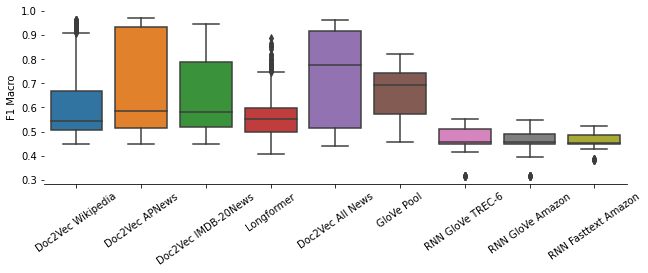

In [19]:
remap = {"doc2vec_wiki_all":"Doc2Vec Wikipedia", "doc2vecapnews":"Doc2Vec APNews",
         "doc2vecwikiimdb20news011001":"Doc2Vec IMDB-20News", "allenai/longformer-large-4096":"Longformer",
         "allenai/longformer-base-4096":"Longformer",
         "glove": "GloVe Pool", "glove_trec_6": "RNN GloVe TREC-6", "glove_amazon": "RNN GloVe Amazon", 
        "fasttext_amazon": "RNN Fasttext Amazon", "allnews_05_15_30":"Doc2Vec All News"}    

files = ["/home/philipp/projects/dad4td/reports/unsup_final/pyod_nored_doc2vec_longformer.tsv", 
         "/home/philipp/projects/dad4td/reports/unsup_final/pyod_umap_doc2vec_longformer.tsv",
        "/home/philipp/projects/dad4td/reports/unsup_final/KNN_and_ivis.tsv",
        "/home/philipp/projects/dad4td/reports/unsup_final/all_news_all.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/KNN_and_ivis_longformer.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/AE_all.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/AE_longformer.tsv",
         "/home/philipp/projects/dad4td/reports/unsup_final/WEP_RNNs.tsv"
        ]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.replace({"model_name":remap})

create_barplot(df, x="model_name", y="f1_macro", hue=None, kind="box", height=3, aspect=3/1,
               filename="rnn-pooling-model", labely="F1 Macro")

## Dimensionality Reduction

ivis    144
Name: name, dtype: int64
UMAP    56
IVIS    36
PCA     36
TSNE    18
NONE     6
Name: dim_reducer, dtype: int64


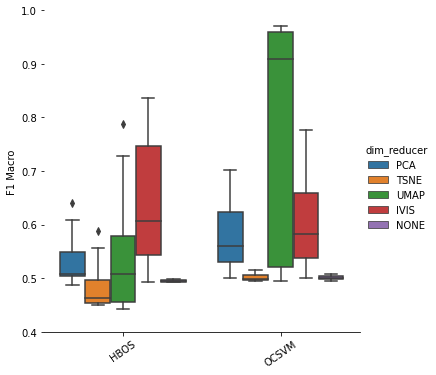

In [135]:
files = ["/home/philipp/projects/dad4td/reports/unsupervised/0001_dim_reducer_test.tsv",
         "/home/philipp/projects/dad4td/reports/unsupervised/0001_pyod_test_umap_all_data.tsv",
         "/home/philipp/projects/dad4td/reports/unsupervised/0001_ivis_test.tsv"
        ]


df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df.n_components = df.n_components.fillna(df.embedding_dims)
print(df.name.value_counts())
df.name = df.name.fillna("None")
df.name = df.name.map(lambda x: f"dim_reducer::{x}::")
df.dim_reducer = df.dim_reducer.fillna(df.name)

df = df.where(df.model_name.isin(["doc2vec_wiki_all"])).dropna(how="all")
df = df.where(df.outlier_detector.isin(["HBOS", "OCSVM"])).dropna(how="all")
#
df = df.dropna(subset=["dim_reducer"])

df.dim_reducer = df.dim_reducer.map(lambda x: x.split("dim_reducer")[-1][2:-2].upper())
df = df.fillna(0)
df = df.where(df.outlier_detector!=0).dropna(how="all")
df = df.replace({"dim_reducer":{"LASS 'IVIS.IVIS.IVIS":"IVIS"}})
print(df.dim_reducer.value_counts())

g = create_barplot(df, x="outlier_detector", y="f1_macro", hue="dim_reducer", kind="box", aspect=1, height=5)
g.set(ylim=(0.4,1.0))
#g.map(plt.axhline, y=0.5, ls='--', c='red')
g.set_axis_labels("", "F1 Macro")
plt.savefig("/home/philipp/projects/dad4td/thesis/pictures/dimreducers.png", format="png")

scores2 = ["f1_macro", "f1", "in_rec", "out_rec", "roc_auc", "pr_auc"]
df_group = df.groupby(["outlier_detector", "model_name"]).mean()["f1_macro"]
latex_code = df_group.to_latex(float_format="%.3f")
latex_code = latex_code.replace("\\\n", "\\ \hline\n")

300.0    59
Name: n_components, dtype: int64


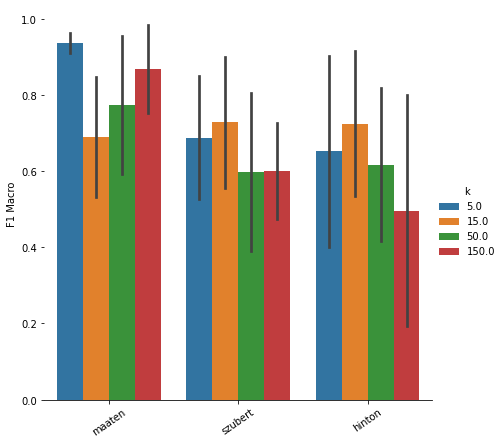

In [20]:

files = ["/home/philipp/projects/dad4td/reports/unsup_final/0003_invis_params.tsv"]
df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.fillna("False")
print(df.n_components.value_counts())
df.groupby([ "n_epochs_without_progress", "k"]).mean().f1_macro
g = sns.catplot(
    data=df, kind="bar",
    x="model", y="f1_macro", hue="k",
    ci="sd", height=6
)
g.despine(left=True)
g.set_axis_labels("", "F1 Macro")
g.set_xticklabels(rotation=35)
g

## Progresss Doc2Vec Training

Index(['Unnamed: 0', 'epoch', 'f1_macro', 'in_f1', 'out_f1', 'out_prec',
       'out_rec', 'seed'],
      dtype='object')


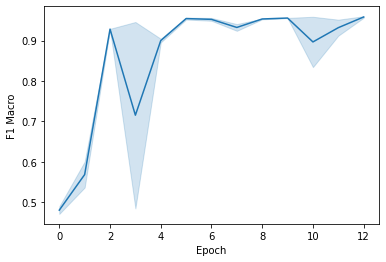

In [132]:
files = ["/home/philipp/projects/dad4td/models/all_news_05_50_20/all_news_results.tsv"
        ]

df = pd.concat([pd.read_csv(filename, sep="\t") for filename in files]).reset_index(drop=True)
df = df.replace({"model_name":remap})
df = df.fillna(0)

print(df.columns)
g = sns.lineplot(x="epoch", y="f1_macro", data=df)
g.set(xlabel='Epoch', ylabel='F1 Macro')
plt.savefig("/home/philipp/projects/dad4td/thesis/pictures/progress-doc2vec-train.png", format="png")
